In [ ]:
!pip install torchinfo

In [13]:
import torch
import torch.nn as nn
import torchvision.models as models

from torchsummary import summary
from model import LSTM_with_EFFICIENTNET

In [33]:
model=models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.eval()
input=torch.randn(150,3,224,224).to(device)

with torch.no_grad():
    output=model(input)
    print(output.shape)


torch.Size([150, 1000])


In [ ]:
model = LSTM_with_EFFICIENTNET(num_classes=51, hidden_size=128, num_layers=2,pretrained=True,fine_tune=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

summary(model,input_size=(24,3, 10, 224, 224))

In [25]:
model=models.efficientnet_b7(weights=models.EfficientNet_B7_Weights.DEFAULT)

model.to(device)

# summary with batch size 128
summary(model, input_size=(24,3, 224, 224))


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [2, 24, 3, 224, 224]

In [ ]:
list(model.children())[:-1]

summary(model, (3, 224, 224))

In [ ]:
resnet = models.resnet18()
resnet.to(device)
# list(resnet.children())[:-2]
summary(resnet, (3, 224, 224))

In [1]:
import pickle

# file_name='history/vit_128_2_24_15_Thu Apr 27 123401 2023/history.pickle'
file_name='history/b0_512_2_24_16_Thu Apr 27 210137 2023/history.pickle'
# with open('history/b0_128_2_24_15_Sat Apr 22 120648 2023/history.pickle', 'rb') as f:
# with open('history/b0_256_2_24_15_Wed Apr 26 084548 2023/history.pickle', 'rb') as f:
with open(file_name, 'rb') as f:
    history = pickle.load(f)

history


{'train_loss': [0.1530045550419581,
  0.14714955238710342,
  0.14395373234362907,
  0.14124265903265787,
  0.13925662454839483,
  0.1381036189654687,
  0.1371515184969476,
  0.13641615526924372,
  0.1356528930707847,
  0.13483858172373003,
  0.1339395507879371,
  0.13334707455702904,
  0.13285611453734167,
  0.1322646686120355,
  0.13174592521119244,
  0.13133884945693944,
  0.1309190910632314,
  0.1304005175017302,
  0.13009872234517364,
  0.129743476879418,
  0.12941256866741668,
  0.12899081070383073,
  0.12873181150393345,
  0.12842467107265657,
  0.12817632255170752,
  0.12801813284030877,
  0.1278298495479312,
  0.12770965741923,
  0.12754706296376456,
  0.12731999395818347,
  0.12715205733769708,
  0.12703273801454307,
  0.12691685095367744,
  0.1268297249468707,
  0.12670787844150894,
  0.1266409610774031,
  0.12656355074171705,
  0.1265008189998201,
  0.12637370109790297,
  0.1262768571146517,
  0.1261549460768082,
  0.12614133711180633,
  0.12612884276257627,
  0.126030250439

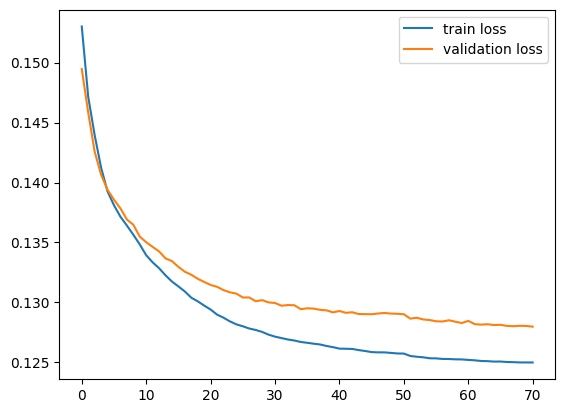

In [2]:
# plot a graph of the training loss and validation loss over the training epochs
import matplotlib.pyplot as plt
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')
plt.legend()
plt.show()


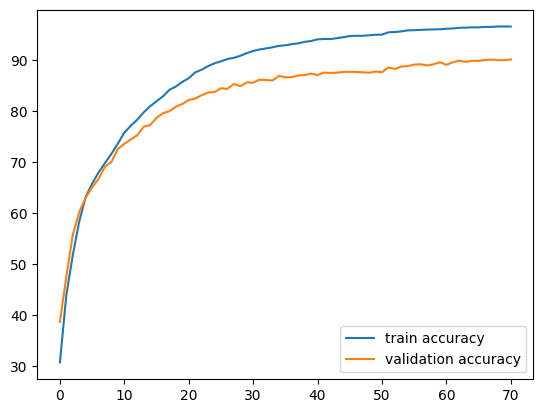

In [3]:
# plot a graph of the training accuracy and validation accuracy over the training epochs
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [4]:
max_accuracy = max(history['val_acc'])
max_accuracy

90.12242626599888